Data cleaning, visulalization and feature engineering

In [2]:
import pandas as pd
df = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)

In [2]:
# df_test.info()
# df_test.head(40)
# df_test.describe()

I observe that the variables Ticket and Cabin PassengeId, Name and Embarcation are irrelevant, therefore I drop them.


In [3]:
df = df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)
df_test = df_test.drop(['Cabin', 'Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)

I change the sex and Embarked into numerical variable

In [4]:
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df = df.drop(['Sex'], axis=1)
# df.head(5)

df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_test = df_test.drop(['Sex'], axis=1)

Sum Parch and SibSP into Familiy size
Remove Family size

In [5]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
# df.head(5)

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test = df_test.drop(['SibSp', 'Parch'], axis=1)

Filling the missing ages

In [6]:
import numpy as np

median_ages = np.zeros((2, 3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df[(df['Gender'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
df['AgeFill'] = df['Age']
df_test['AgeFill'] = df_test['Age']

for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender == i) & (df.Pclass == j+1),'AgeFill'] = median_ages[i, j]
        df_test.loc[ (df_test.Age.isnull()) & (df_test.Gender == i) & (df_test.Pclass == j+1),'AgeFill'] = median_ages[i, j]
# df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

In [7]:
df = df.drop(['Age'], axis=1)

df_test = df_test.drop(['Age'], axis=1)

In [8]:
df.info()
median_ages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Fare          891 non-null float64
Gender        891 non-null int64
FamilySize    891 non-null int64
AgeFill       891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

Filling the missing fare in the test set

In [9]:
df_test['FareFill'] = df_test['Fare']
df['FareFill'] = df['Fare']

Fare_median = df_test['FareFill'].dropna().median()
df_test.loc[df_test.Fare.isnull(), ['FareFill']] = Fare_median

df_test = df_test.drop(['Fare'], axis=1)
df = df.drop(['Fare'], axis=1)

df_test.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass        418 non-null int64
Gender        418 non-null int64
FamilySize    418 non-null int64
AgeFill       418 non-null float64
FareFill      418 non-null float64
dtypes: float64(2), int64(3)
memory usage: 16.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Gender        891 non-null int64
FamilySize    891 non-null int64
AgeFill       891 non-null float64
FareFill      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


We add the age class feature

In [10]:
df['Age*Class'] = df.AgeFill * df.Pclass
df_test['Age*Class'] = df_test.AgeFill * df_test.Pclass
df_test.head(5)

,Pclass,Gender,FamilySize,AgeFill,FareFill,Age*Class
0,3,1,0,34.5,7.8292,103.5
1,3,0,1,47.0,7.0000,141.0
2,2,1,0,62.0,9.6875,124.0
3,3,1,0,27.0,8.6625,81.0
4,3,0,2,22.0,12.2875,66.0


In [11]:
# df.dtypes
train_data = df.values
test_data = df_test.values
# train_data

Test set preprocessing

In [12]:
df.head(2)

,Survived,Pclass,Gender,FamilySize,AgeFill,FareFill,Age*Class
0,0,3,1,1,22.0,7.2500,66.0
1,1,1,0,1,38.0,71.2833,38.0


In [13]:
df_test.head(2)
train_data[0]

array([  0.  ,   3.  ,   1.  ,   1.  ,  22.  ,   7.25,  66.  ])

Random forest

In [14]:
X_train = train_data[0::, 1::]
X_test = test_data[0::, 0::]
Y = train_data[0::, 0]

Split train into train and crossval

In [26]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, Y, test_size=0.1, random_state=0)

Classification algorithms

In [15]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])

# Take the same decision trees and run it on the test data
output = forest.predict(test_data[0::, 0::])

# Score is 0.70

In [16]:
# Logistic regression basic

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5)
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.75

Let's ttry to improve the performance of the algorithm'

In [18]:
# Weight modification

from sklearn import linear_model

clf = linear_model.LogisticRegression(C=1e5, class_weight='balanced')
clf = clf.fit(X_train, Y)
output = clf.predict(X_test)

# Score is 0.71

Analyse data, let's check the covariance between the survivors and the features

In [33]:
from sklearn import preprocessing
train_data_scaled = preprocessing.scale(train_data)
np.cov(np.transpose(train_data_scaled))[0, :]

array([ 1.0011236 , -0.33886135, -0.54396189,  0.01665768, -0.05964631,
        0.25759563, -0.33172898])

In [34]:
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['Survived', 'Pclass', 'Gender', 'FamilySize', 'AgeFill', 'FareFill',
        'Age*Class'],
       dtype='object')]

Plot

/home/mehdi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x7f82843ebf60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82843faa20>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f82843ffc18>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f82843ff400>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f82843f49b0>,
  <matplotlib.lines.Line2D at 0x7f8284367f98>]}

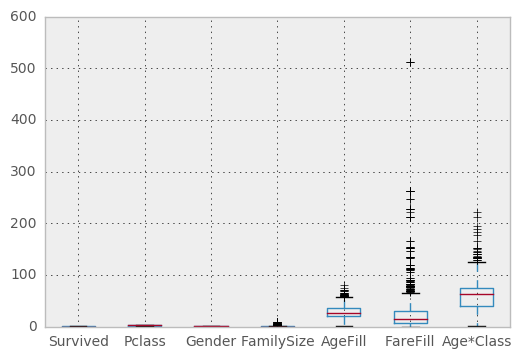

In [39]:
import matplotlib.pyplot as plt
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f828432ba58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f82840d6208>]], dtype=object)

/home/mehdi/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


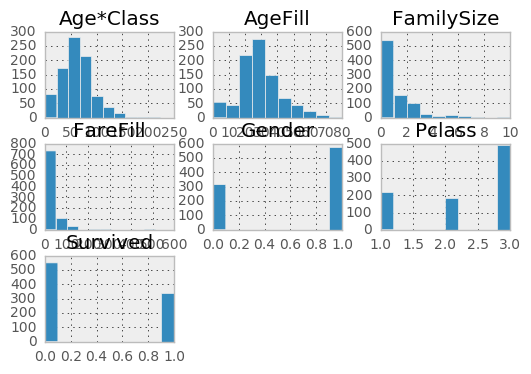

In [40]:
df.hist()

Survived
0    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

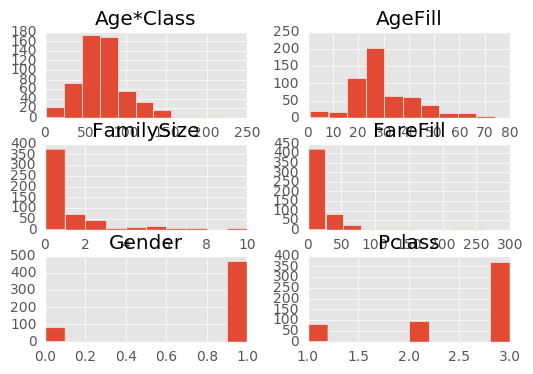

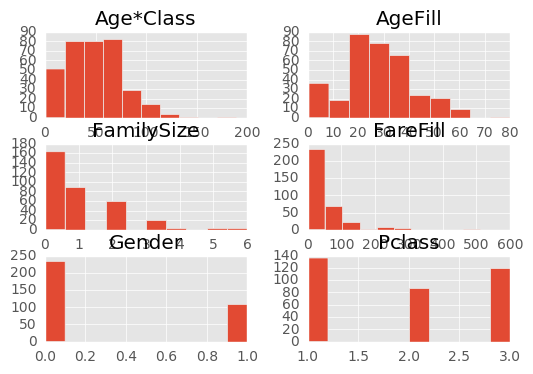

In [44]:
plt.style.use('ggplot')
df.groupby('Survived').hist()

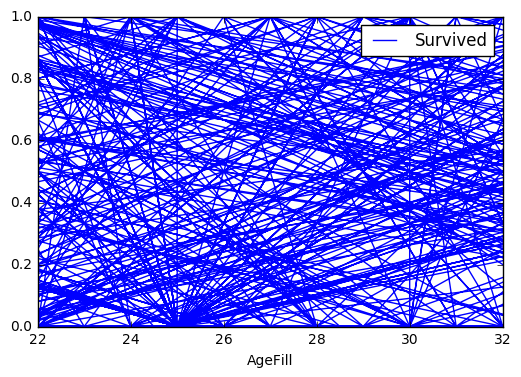

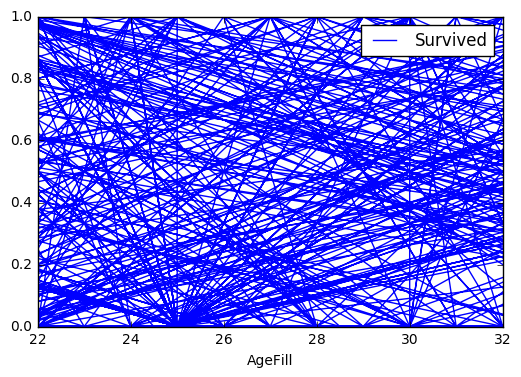

In [37]:
import matplotlib.pyplot as plt
df.plot(x='AgeFill', y='Survived')
plt.show()

In [19]:
output = output.astype(int)
passenger_id = np.arange(892, 1310, 1)
np.savetxt("prediction.csv", output, delimiter=",")
prediction = np.vstack((passenger_id, output)).transpose()
names = ['PassengerId', 'Survived']
df = pd.DataFrame(prediction, index=passenger_id, columns=names)
df.head(3)
df.to_csv('prediction.csv', index=False, header=True, sep=',')